In [1]:
# The algebraic cubic equation
#x**3 - x + c = 0

In [2]:
# importing relevant modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import import_ipynb

In [3]:
# The Hopf bifurcation equations 
def Hopf(t,z,b,s):
    u1, u2 = z[0], z[1]
    return [b*u1 - u2 + s*u1*(u1**2 + u2**2), u1 + b*u2 + s*u2*(u1**2 +u2**2)]

In [4]:
# The modified Hopf bifurcation equations 
def mod_Hopf(t,z,b,s):
    u1, u2 = z[0], z[1]
    return [b*u1 - u2 + s*u1*(u1**2 + u2**2) - u1*(u1**2 + u2**2)**2, u1 + b*u2 + s*u2*(u1**2 +u2**2) - u2*(u1**2 + u2**2)**2]

In [5]:
#natural parameter continuation
# b is the parameter we vary
#b = 0.1
#increment = 0.01

#parameter = parameter + increment 
#initial_guess 

In [6]:
def shooting(u0, fun, args):
    u, T = u0[:-1], u0[-1]
    sol = solve_ivp(fun, (0,T), u, args = args, rtol = 1e-6)
    final_states = sol.y[:,-1]
    phase_condition = np.array([fun(T, u, args[0], args[1])[0]])
    return np.concatenate((u-final_states, phase_condition))

In [7]:
#find the roots of the system of 2 ODE's with an initial guess
from scipy.optimize import fsolve
s=-1
root = fsolve(shooting,[1,0,6.2],args = (Hopf, (2,s)))
root

array([ 1.41421405e+00, -1.96663379e-06,  6.28319044e+00])

In [8]:
root = fsolve(shooting,[1,0,6.2],args = (mod_Hopf, (2,s)))
root

array([9.99999967e-01, 1.97101201e-07, 6.28318802e+00])

In [13]:
#Numerical continuation for Hopf bifurcation equations 
#increments the a parameter by a set amount and attempts to find the solution
#for the new parameter value using the last found solution as an initial guess
phase_condition = 6.2
initial_guess=[1,0,phase_condition]
roots = []
for b in np.arange(0.1,2,0.1):
    root = fsolve(shooting,initial_guess,args = (Hopf, (b,s)))
    initial_guess = root
    roots.append(root)
    print(root)
    

[3.16227405e-01 7.22127415e-08 6.28318090e+00]
[ 4.47214168e-01 -2.29184063e-07  6.28318593e+00]
[ 5.47723671e-01 -6.68259881e-07  6.28318958e+00]
[ 6.32456978e-01 -1.15682336e-06  6.28319224e+00]
[ 7.07108695e-01 -1.91370815e-06  6.28319493e+00]
[ 7.74599092e-01 -2.90702841e-06  6.28319808e+00]
[ 8.36663737e-01 -5.19519221e-06  6.28320274e+00]
[ 8.94432243e-01 -8.08284037e-06  6.28320942e+00]
[ 9.48689239e-01 -1.06948348e-05  6.28321962e+00]
[ 1.00001055e+00 -2.11039601e-05  6.28323668e+00]
[ 1.04882122e+00 -2.72271061e-05  6.28324725e+00]
[ 1.09545563e+00 -2.52419919e-05  6.28322858e+00]
[ 1.14018045e+00 -1.30728870e-05  6.28321141e+00]
[ 1.18321911e+00 -8.84365633e-06  6.28320306e+00]
[ 1.22474741e+00 -7.60091672e-06  6.28319856e+00]
[ 1.26491251e+00 -4.61251017e-06  6.28319553e+00]
[ 1.30384196e+00 -5.01378211e-06  6.28319374e+00]
[ 1.34164177e+00 -3.52559491e-06  6.28319230e+00]
[ 1.37840556e+00 -2.60029810e-06  6.28319125e+00]


In [17]:
# Numerical continuation for modified Hopf bifurcation equations 
#increments the a parameter by a set amount and attempts to find the solution
#for the new parameter value using the last found solution as an initial guess
phase_condition_1 = 6.2
initial_guess_1=[1,0,phase_condition_1]
roots_1 = []
for b in np.arange(2,-1,-0.1):
    root_1 = fsolve(shooting,initial_guess_1,args = (mod_Hopf, (b,s)))
    initial_guess_1 = root_1
    roots_1.append(root_1)
    print(root_1)
    

[9.99999967e-01 1.97101201e-07 6.28318802e+00]
[ 9.82999473e-01 -3.88004345e-07  6.28318838e+00]
[ 9.65288742e-01 -6.88675309e-07  6.28318879e+00]
[ 9.46797054e-01 -1.73688320e-06  6.28318938e+00]
[ 9.27441591e-01 -2.15376063e-06  6.28319006e+00]
[ 9.07125552e-01 -2.66631717e-06  6.28319096e+00]
[ 8.85734031e-01 -3.44911784e-06  6.28319221e+00]
[ 8.63129313e-01 -4.83703041e-06  6.28319405e+00]
[ 8.39143745e-01 -5.59165882e-06  6.28319678e+00]
[ 8.13572115e-01 -8.66604401e-06  6.28320171e+00]
[ 7.86156480e-01 -1.41039601e-05  6.28321178e+00]
[ 7.56568637e-01 -2.52699792e-05  6.28323906e+00]
[ 7.24374311e-01 -3.42445975e-05  6.28326852e+00]
[ 6.88977001e-01 -1.32620237e-05  6.28323258e+00]
[ 6.49585111e-01 -7.63023463e-06  6.28321275e+00]
[ 6.05003405e-01 -3.89462180e-06  6.28320256e+00]
[ 5.53378900e-01 -2.17068622e-06  6.28319677e+00]
[ 4.91549764e-01 -9.63824435e-07  6.28319211e+00]
[ 4.13304972e-01 -3.36634745e-07  6.28318725e+00]
[3.0266789e-01 4.5351246e-08 6.2831810e+00]
[ 1.01204

/Users/theabarnes/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


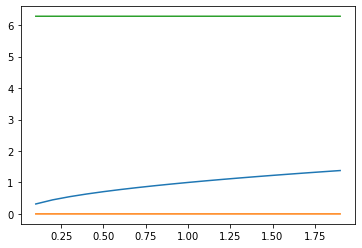

In [11]:
# This should be correct
# plotting numerical continuation for Hopf bifurcation
# blue line is x variable
# orange line is y varaible 
# green line is period 

plt.plot(np.arange(0.1,2,0.1), roots)

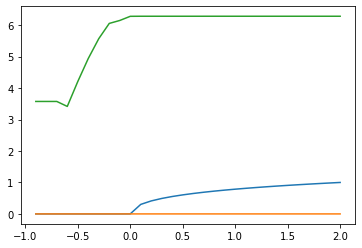

In [18]:
# plotting numerical continuation for modified Hopf bifurcation
plt.plot(np.arange(2,-1,-0.1), roots_1)